# **Clustering Programming:**

In this task you are asked to implement a single-pass clustering algorithm in Python. The algorithm is a simplified version of the k-Means algorithm. Download assignment04.ipynb and data.csv to use it as template for your implementation. The template loads the data, processes it, and bundles it for clustering. You must implement the single-pass clustering in the do_cluster function, see the comments there for details. You may not
import or use any additional modules. Only the the Python standard functionality is allowed for the implementation.

In [1]:
# Load modules
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data from CSV file
df = pd.DataFrame()
df = pd.read_csv('data.csv', dtype={'Radius (cm)': float, 'Weight (grams)': float})
# Replace zero values with median value within class
df = df.groupby(['Fruit (class)']) # sort by class
proc_df = pd.DataFrame() # create a new dataframe to collect results
for key, group in df: # go over groups
  group = group.replace(0, group.median(axis=0)) # replace missing values with median
  proc_df = pd.concat([proc_df, group]) # concatenate groups into new dataframe

df = proc_df.sort_index() # overwrite original dataframe with results
# Normalize
radius = df['Radius (cm)']
df['Radius (cm)'] = (radius-radius.min())/(radius.max()-radius.min())
radius = df['Weight (grams)']
df['Weight (grams)'] = (radius-radius.min())/(radius.max()-radius.min())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [4]:
# Radius values
radius = list(df['Radius (cm)'])
print(radius)

[0.06451612903225798, 0.6451612903225805, 0.48387096774193544, 0.16129032258064516, 0.0, 0.1290322580645161, 0.3225806451612903, 1.0, 0.1290322580645161, 0.3548387096774194, 0.5161290322580645, 0.09677419354838704, 0.8064516129032256, 0.7096774193548386, 0.6451612903225805, 0.2580645161290322, 0.7741935483870968, 0.06451612903225798, 0.5161290322580645, 0.6451612903225805, 0.09677419354838704, 0.0, 0.19354838709677422, 0.4193548387096773, 0.6774193548387097, 0.29032258064516125, 0.3548387096774194, 0.1290322580645161, 0.0, 0.3225806451612903, 0.7096774193548386, 0.9354838709677419]


In [5]:
# Weight values
weight = list(df['Weight (grams)'])
print(weight)

[0.15037593984962405, 0.2631578947368421, 1.0, 0.13533834586466165, 0.0, 0.3458646616541353, 0.21804511278195488, 0.7593984962406015, 0.22556390977443608, 0.2932330827067669, 0.45864661654135336, 0.21052631578947367, 0.8421052631578947, 0.6992481203007519, 0.15037593984962405, 0.09774436090225563, 0.5263157894736842, 0.15037593984962405, 0.45864661654135336, 0.7142857142857143, 0.20300751879699247, 0.18045112781954886, 0.24812030075187969, 0.3007518796992481, 0.6466165413533834, 0.43609022556390975, 0.18045112781954886, 0.18796992481203006, 0.0, 0.3383458646616541, 0.7293233082706767, 0.7669172932330827]


In [6]:
# Classes
classes = list(df['Fruit (class)'])
print(classes)

['Lemon', 'Apple', 'Pear', 'Lemon', 'Lemon', 'Apple', 'Lemon', 'Pear', 'Apple', 'Apple', 'Apple', 'Lemon', 'Pear', 'Pear', 'Lemon', 'Lemon', 'Pear', 'Lemon', 'Apple', 'Pear', 'Lemon', 'Apple', 'Apple', 'Apple', 'Pear', 'Apple', 'Lemon', 'Lemon', 'Lemon', 'Apple', 'Pear', 'Pear']


In [18]:
# Combine radius, weight, and class to tuples (we have to keep the class for later plotting)
tuples = list(zip(radius, weight, classes))
print(tuples)

[(0.06451612903225798, 0.15037593984962405, 'Lemon'), (0.6451612903225805, 0.2631578947368421, 'Apple'), (0.48387096774193544, 1.0, 'Pear'), (0.16129032258064516, 0.13533834586466165, 'Lemon'), (0.0, 0.0, 'Lemon'), (0.1290322580645161, 0.3458646616541353, 'Apple'), (0.3225806451612903, 0.21804511278195488, 'Lemon'), (1.0, 0.7593984962406015, 'Pear'), (0.1290322580645161, 0.22556390977443608, 'Apple'), (0.3548387096774194, 0.2932330827067669, 'Apple'), (0.5161290322580645, 0.45864661654135336, 'Apple'), (0.09677419354838704, 0.21052631578947367, 'Lemon'), (0.8064516129032256, 0.8421052631578947, 'Pear'), (0.7096774193548386, 0.6992481203007519, 'Pear'), (0.6451612903225805, 0.15037593984962405, 'Lemon'), (0.2580645161290322, 0.09774436090225563, 'Lemon'), (0.7741935483870968, 0.5263157894736842, 'Pear'), (0.06451612903225798, 0.15037593984962405, 'Lemon'), (0.5161290322580645, 0.45864661654135336, 'Apple'), (0.6451612903225805, 0.7142857142857143, 'Pear'), (0.09677419354838704, 0.203007

# **Clustering**

In [26]:
# Squared Euclidean distance (use this as delta function)
def distance(p1,p2):
  dist = (p2[0]-p1[0])**2+(p2[1]-p1[1])**2
  return dist

# Takes points as list of tuples and a threshold.
# Example call: do_cluster([(2,1,'Apple'),(6,3,'Lemon'),(1,1.5,'Apple'),(2,2,'Pear')], 7)
def do_cluster(tuples, threshold):
  
  ###############################################
# IMPLEMENT SINGLE PASS CLUSTERING HERE #
###############################################
  clusters = [] # Store clusters as lists of object indices initially to 
      #enable check for identity in the algorithm, i.e. each object is identified␣ by its index
  centroids = [] # Store centroids
  
  for obj_index, obj in enumerate(tuples):
    
    for cluster_index, cluster in enumerate(clusters):
      centroid = centroids[cluster_index] # Look up centroid corresponding to cluster

      if distance(obj, centroid) <= threshold:
        cluster.append(obj_index) # Add object (represented by its index) to cluster
        
        weight_object = 1 / len(cluster) # weighting factor of the object
        
        weight_centroid = (len(cluster) - 1) / len(cluster) # weighting factor of the centroid 
        
        updated_centroid = list(centroid) # As list to allow␣manipulation

        # Perform centroid update. The calculation is done element-wise.

        for j in range(0, len(updated_centroid) - 1):  # Last element is the class
            
            updated_centroid[j] = weight_object * obj[j] + weight_centroid * centroid[j]

            centroids[cluster_index] = tuple(updated_centroid) # Store updated centroid as tuple again
        break # Continue with for loop over objects


      # Check whether the current object is assigned to any cluster
        # This is where check for object identity is needed
    assigned_to_cluster = False
    for cluster in clusters:
      if obj_index in cluster:
        assigned_to_cluster = True
        break


# Create new cluster and set centroid
    if not assigned_to_cluster:
      clusters.append([obj_index])
      centroids.append(tuples[obj_index])

# Convert object indices to objects
  for cluster in clusters:
    for i, obj_index in enumerate(cluster):
            cluster[i] = tuples[obj_index]
  return clusters



clusters = do_cluster(tuples, 0.33) # distance threshold, aka Delta, is set to 0.33
print(clusters)

[[(0.06451612903225798, 0.15037593984962405, 'Lemon'), (0.16129032258064516, 0.13533834586466165, 'Lemon'), (0.0, 0.0, 'Lemon'), (0.1290322580645161, 0.3458646616541353, 'Apple'), (0.3225806451612903, 0.21804511278195488, 'Lemon'), (0.1290322580645161, 0.22556390977443608, 'Apple'), (0.3548387096774194, 0.2932330827067669, 'Apple'), (0.5161290322580645, 0.45864661654135336, 'Apple'), (0.09677419354838704, 0.21052631578947367, 'Lemon'), (0.6451612903225805, 0.15037593984962405, 'Lemon'), (0.2580645161290322, 0.09774436090225563, 'Lemon'), (0.06451612903225798, 0.15037593984962405, 'Lemon'), (0.5161290322580645, 0.45864661654135336, 'Apple'), (0.09677419354838704, 0.20300751879699247, 'Lemon'), (0.0, 0.18045112781954886, 'Apple'), (0.19354838709677422, 0.24812030075187969, 'Apple'), (0.4193548387096773, 0.3007518796992481, 'Apple'), (0.29032258064516125, 0.43609022556390975, 'Apple'), (0.3548387096774194, 0.18045112781954886, 'Lemon'), (0.1290322580645161, 0.18796992481203006, 'Lemon'), 

# **Plotting**

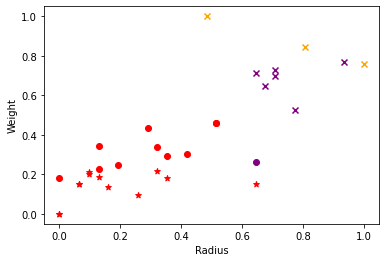

In [27]:
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange'] # provide some colors for the clusters
marker = {'Lemon': '*', 'Apple': 'o', 'Pear': 'x'} # different marker for each class

i = 0
for c in clusters:
  tpls = list(zip(*c))
  x = tpls[0]
  y = tpls[1]
  cls = tpls[2]
  c = colors[i%len(colors)]
  m = [marker[cl] for cl in cls]
  for _x, _y, _m in zip(x, y, m):
    plt.scatter(_x, _y, c=c, marker=_m)
    
    i += 1
plt.xlabel("Radius")
plt.ylabel("Weight")
plt.show()